# ASTRO 310 Lecture 17 - matplotlib 2

### Exercise 1: Martian topo map  (10 points)

* Download the image “Olympus_Mons_MOLA_64ppd.jpg” from the exercise page. This is an image containing elevation data for the region around the Olympus Mons volcano on Mars, derived from the MOLA instrument on the Mars Global Surveyor spacecraft.  

* Read the image into Python. The result will be a 3D array containing (R,G,B) values for each pixel. Sum over the axis with length 3 to get total values, then scale the result to the range (-5664, 21185). The result will be a 2D array of elevation values in meters.

[2 points]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# read image
data = plt.imread("Olympus_Mons_MOLA_64ppd.jpg")

# sum rgb values
data = np.sum(data, axis=2)

# scale to range
data = data / np.max(data)
data = data * (21185+5664)
data = data - 5664
data

array([[-3979.35686275, -3979.35686275, -3979.35686275, ...,
          548.12156863,   548.12156863,   548.12156863],
       [-3979.35686275, -3979.35686275, -3979.35686275, ...,
          548.12156863,   548.12156863,   548.12156863],
       [-3979.35686275, -3979.35686275, -3979.35686275, ...,
          548.12156863,   548.12156863,   548.12156863],
       ...,
       [-5664.        , -5664.        , -5664.        , ...,
        -5664.        , -5664.        , -5664.        ],
       [-5664.        , -5664.        , -5664.        , ...,
        -5558.70980392, -5558.70980392, -5558.70980392],
       [-5664.        , -5664.        , -5664.        , ...,
        -5664.        , -5664.        , -5664.        ]])

* Calculate the grid spacing in km so that you can specify the image extent in km. The image is centered on latitude 11.875 degrees N, longitude 235.5 degrees E. The radius of Mars is 3389.5 km. The image samples the MOLA dataset at 64 pixels per degree.

[3 points]


In [14]:
lat = 11.875
long = 235.5
r = 3389.5

circum = 2*np.pi*r

km_per_deg = circum / 360
km_per_pix = km_per_deg / 64

* Make a color map of the data with appropriate image extents, and produce a vertical color bar. Label the color bar “Elevation (m)”.  Don't forget the other x and y labels and title.

* Produce an array of contour levels spaced by 1000 m, starting with -5000 m and ending with 21000 m. Using these levels, overlay a contour plot on the image, making the contours black with a line width of 0.5. You will need to use the argument `origin='upper'` to make the contours match up with the image (which has a different default for this keyword).  

[5 points]

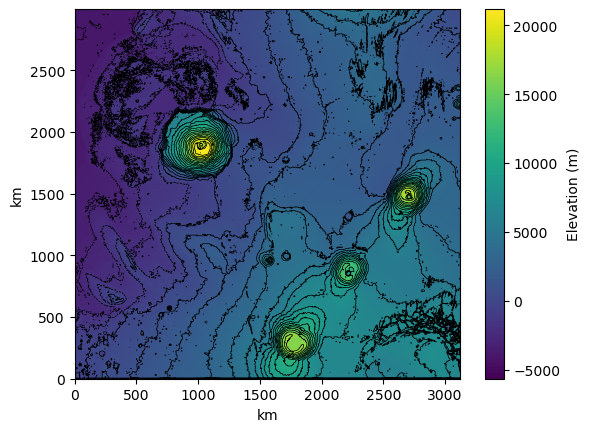

In [15]:
extent = [0, data.shape[1]*km_per_pix, 0, data.shape[0]*km_per_pix]
plt.imshow(data, extent=extent)
plt.colorbar().set_label("Elevation (m)")
plt.xlabel("km")
plt.ylabel("km")

levels = np.arange(-5000, 21000, 1000)
plt.contour(data, levels, origin='upper', colors=["black"], linewidths=[0.5], extent=extent)

###  Exercise 2: pulsar positions  (10 points)

* Using Astropy, read the ATNF pulsar catalog file ('atnf_pulsars_20200112.dat') we worked with last time into a table.

* Create an array of `SkyCoord` objects using the 'ra', 'dec', and 'distance' columns from the file. The RA and Dec are strings, but the `SkyCoord` constructor will interpret them properly if you supply `unit=('hour', 'deg', 'kpc')` as an argument. Note that a `SkyCoord` object can be a single position or an array of positions.

* By default these coordinates will be in the ICRS (equatorial) frame. Convert them to the galactocentric frame using the `transform_to` method. Galactocentric coordinates are like galactic coordinates, but the origin is the center of the Galaxy rather than our location. 

* As we did last time, create “binary” and “not-binary” mask arrays using the mask attribute of the 'companion_type' column from the table.

[5 points]


In [16]:
import astropy.io.ascii
import astropy.coordinates
t = astropy.io.ascii.read("atnf_pulsars_20200112.dat", guess=False, delimiter='|', header_start=2, data_start=3)

coords = astropy.coordinates.SkyCoord(t["ra"], t["dec"], t["distance"], unit=('hour', 'deg', 'kpc'))
coords = coords.transform_to('galactocentric')
nonbinaries = t['companion_type'].mask
binaries = ~nonbinaries

* Create a 3D scatter plot showing the (x,y,z) positions of the pulsars. Use different colored symbols for the binaries and isolated pulsars, and include a legend. Note that the position array we created above has `x`, `y`, and `z` attributes that you can use directly.

* Create and plot a wireframe representing the Galactic plane. This should be a disk made from 13 radius points from 0 to 25 kpc and 181 angle points from 0 to $2\pi$. Use the radius and angle to create the x and y coordinates, and make the z coordinates all zero.

* Optional: also plot the position of the Sun and experiment with different viewing angles.

[5 pts]


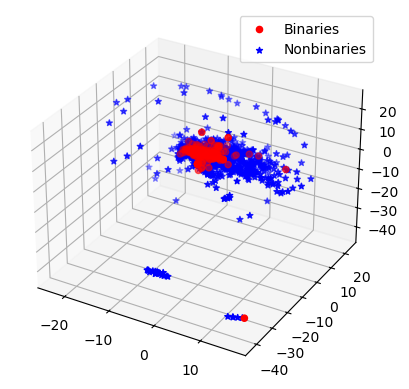

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coords.x[binaries], coords.y[binaries], coords.z[binaries], c='r', marker="o")
ax.scatter(coords.x[nonbinaries], coords.y[nonbinaries], coords.z[nonbinaries], c='b', marker="*")
ax.legend(["Binaries", "Nonbinaries"])

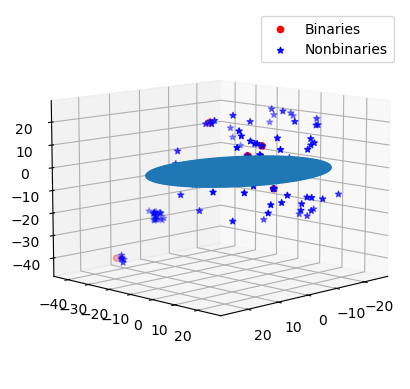

In [48]:
radii = np.linspace(0, 25, 13)
angles = np.linspace(0, 2*np.pi, 181)

r, a = np.meshgrid(radii, angles)

x = r * np.sin(a)
y = r * np.cos(a)
z = np.zeros_like(x)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coords.x[binaries], coords.y[binaries], coords.z[binaries], c='r', marker="o")
ax.scatter(coords.x[nonbinaries], coords.y[nonbinaries], coords.z[nonbinaries], c='b', marker="*")
ax.legend(["Binaries", "Nonbinaries"])
ax.plot_wireframe(x, y, z, rstride=1, cstride=1)
ax.view_init(elev=10, azim=45)